In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("D:\Downloads\creditcard.csv.zip")

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Class',axis = 1)
y = df[['Class']]

In [ ]:
X.columns

In [ ]:
y.columns

In [ ]:
def z_score_normalization(x):
    Mu = np.mean(x,axis = 0)
    std = np.std(x,axis = 0)
    x_norm = (x-Mu)/(std)

    return x_norm

In [ ]:
norm_amount = z_score_normalization(X[['Amount']])
norm_time   = z_score_normalization(X[['Time']])

In [ ]:
norm_time

In [ ]:
norm_amount

In [ ]:
X.drop(['Time','Amount'],axis = 1,inplace = True)

In [ ]:
X['Time'] = norm_time
X['amount'] = norm_amount

In [ ]:
y.columns

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)

In [ ]:
X_train.columns

In [ ]:
y_train.columns

Next thing is to handle the imbalance in the data that is in this the data have high no of non-fraudelent cases 
so inorder to solve this imabalance we nee to solve this 
1)undersampling
Reduce the number of non-fraud cases (Class 0) so it matches the number of fraud cases (Class 1).

✏️ Example:
From 284,315 non-frauds → randomly pick only 492 to match the 492 frauds.
So now you have:

492 frauds

492 non-frauds
2)oversampling
Duplicate or synthesize more fraud cases (Class 1) so it matches the number of non-fraud cases.

Two types:
🔁 a. Random Oversampling
Simply duplicate existing fraud samples

Easy but may lead to overfitting

🧠 b. SMOTE (Synthetic Minority Oversampling Technique)
Generates new synthetic fraud samples based on real ones

Creates slightly modified “fake” examples to enrich diversity

In [ ]:
# Going with undersampling

In [ ]:
train_data = pd.concat([X_train,y_train],axis = 1)

In [ ]:
train_data.columns

In [ ]:
fraud_case = train_data[train_data['Class'] == 1]
non_fraud_case = train_data[train_data['Class'] == 0]

# Undersample non-fraud to match number of fraud samples
non_fraud_sampled = non_fraud_case.sample(n=len(fraud_case), random_state=42)

balanced_data = pd.concat([fraud_case,non_fraud_sampled])

#Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac = 1,random_state = 42).reset_index(drop = True)
X_train_balanced = balanced_data.drop('Class',axis = 1)
y_train_balanced = balanced_data[['Class']]

In [ ]:
X_train_balanced.columns
y_train_balanced.columns

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def compute_cost(x,y,w,b):
    x = np.array(x)
    y = np.array(y)
    m = x.shape[0]
    cost = 0 
    for i in range(m):
        z_i = np.dot(x[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost+=-y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost/=(m)
    return cost
        

In [144]:
w_init = np.zeros(X_train_balanced.shape[1])
b_init = 0

In [148]:
def compute_gradient_logistic(x,y,w,b):
    x = np.array(x)
    y = np.array(y)
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w)+b)
        err_i  = (f_wb_i - y[i])
        for j in range(n):
            dj_dw+=err_i*x[i,j]

        dj_db+=err_i
    dj_dw = dj_dw/(m)
    dj_db = dj_db/(m)
    return dj_dw,dj_db

In [ ]:
import math

In [174]:
def compute_gradient_descent(x,y,w,b,num_iterations,alpha):

    j_history = []
    for i in range(num_iterations):
        dj_dw,dj_db = compute_gradient_logistic(X_train_balanced,y_train_balanced,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i<1000000:
             j_history.append(compute_cost(X_train_balanced,y_train_balanced,w,b))
        if i% math.ceil(num_iterations / 10) == 0:
             print(f"Iteration {i:4d}: Cost {j_history[-1]}")
    return w,b,j_history

In [175]:
num_iterations = 1000
alpha = 0.01
w,b,j_history = compute_gradient_descent(X_train_balanced,y_train_balanced,w_init,b_init,num_iterations,alpha)

Iteration    0: Cost [0.44579083]
Iteration  100: Cost [0.41716406]
Iteration  200: Cost [0.3972556]
Iteration  300: Cost [0.38232296]
Iteration  400: Cost [0.37102333]
Iteration  500: Cost [0.36239513]
Iteration  600: Cost [0.35574859]
Iteration  700: Cost [0.35058597]
Iteration  800: Cost [0.3465451]
Iteration  900: Cost [0.34336]


In [176]:
print(w,b)

[-0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162
 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162
 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162
 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162
 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162 -0.15963162] [-0.94773499]


In [ ]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,1,figsize = (5,5))
axs.plot(range(len(j_history)),j_history,color = "blue")
axs.set_xlabel("iterations")
axs.set_ylabel("j_history")
plt.show()



In [194]:
def predict(x,w,b):
    z = np.dot(x,w)+b
    return sigmoid(z)>=0.9

In [195]:
y_pred = predict(X_test,w,b)

In [196]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)

In [197]:
print(accuracy)

0.9961904427513079


In [199]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print("precision:",precision_score(y_test,y_pred))
print("confuion_matrix:",confusion_matrix(y_test,y_pred))

precision: 0.26666666666666666
confuion_matrix: [[56677   187]
 [   30    68]]


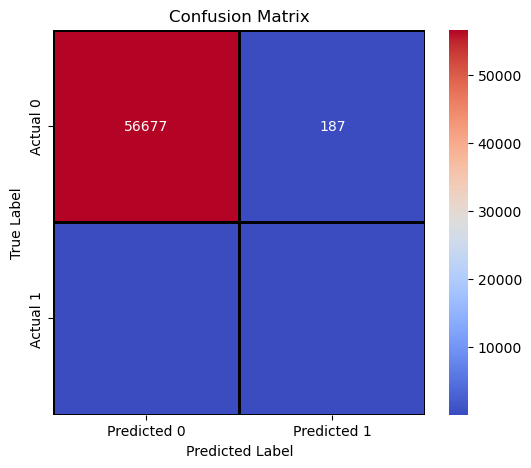

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your confusion matrix
cm = np.array([[56677, 187],
               [30,    68]])

# Set the labels
labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='coolwarm',  # Try 'YlGnBu' or 'Reds' or your own
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            linewidths=1,
            linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
